In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [184]:
df = pd.read_csv("../data/jamb_exam_results.csv")
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [185]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [186]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


### Preparation:

Remove the student_id column.

Fill missing values with zeros.

Do train/validation/test split with 60%/20%/20% distribution.

Use the train_test_split function and set the random_state parameter to 1.

Use DictVectorizer(sparse=True) to turn the dataframes into matrices.


In [187]:
# remove student_id column

df.drop(columns=["student_id"], inplace=True)

In [188]:
# fill missing values with zeros 

df.fillna(value=0, inplace=True)

In [189]:
# do train/validation/test split with 60%/20%/20% distribution

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [190]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [191]:
y_train = df_train.jamb_score.values
y_test = df_test.jamb_score.values
y_val = df_val.jamb_score.values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [192]:
# use DictVectorizer(sparse=True) to turn the dataframes into matrices.

dicts_train = df_train.to_dict(orient='records')
dicts_test = df_test.to_dict(orient='records')
dicts_val = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(dicts_train)
X_test = dv.fit_transform(dicts_test)
X_val = dv.fit_transform(dicts_val)

## Question 1
Let's train a decision tree regressor to predict the jamb_score variable.

Train a model with max_depth=1.

Which feature is used for splitting the data?

study_hours_per_week
attendance_rate
teacher_quality
distance_to_school

In [193]:
model_dtr = DecisionTreeRegressor(max_depth=1)
model_dtr.fit(X_train, y_train)
model_dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [194]:
print(export_text(model_dtr, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



## Question 2
Train a random forest regressor with these parameters:

n_estimators=10

random_state=1

n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

In [195]:
model_rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
model_rfr.fit(X_train, y_train)
model_rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [196]:
# make prediction and find out rmse
y_pred = model_rfr.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_pred, y_val))
print(f"rmse: {rmse:.3f}")

rmse: 42.137


## Question 3
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.

Set random_state to 1.

Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

In [197]:
n_estimators = list(range(10, 210, 10))
rmse_scores = {}

for n in n_estimators: 
    model_rfr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    model_rfr.fit(X_train, y_train)
    y_pred = model_rfr.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_pred, y_val))

    rmse_scores[n] = round(float(rmse), 3)

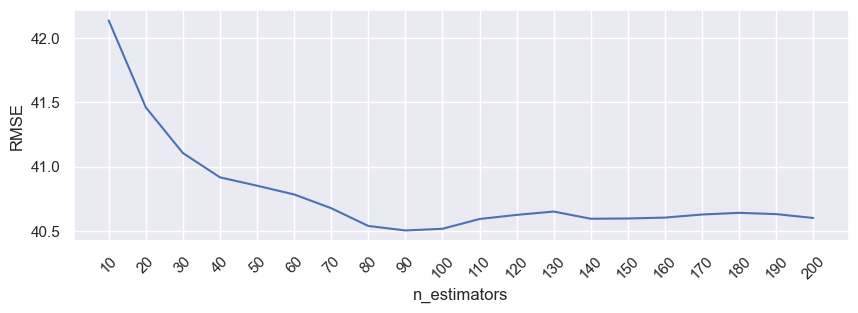

In [198]:
sns.set_theme()

fig = plt.figure(figsize=(10, 3))
plt.plot(n_estimators, rmse_scores.values())
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.xticks(n_estimators, rotation=45);

In [200]:
rmse_scores

{10: 42.137,
 20: 41.461,
 30: 41.106,
 40: 40.917,
 50: 40.852,
 60: 40.784,
 70: 40.677,
 80: 40.539,
 90: 40.504,
 100: 40.517,
 110: 40.593,
 120: 40.625,
 130: 40.651,
 140: 40.595,
 150: 40.597,
 160: 40.604,
 170: 40.628,
 180: 40.641,
 190: 40.631,
 200: 40.601}

## Question 4

Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]

For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)

calculate the mean RMSE

Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

In [201]:
max_depths = [10, 15, 20, 25]
rmse_scores = {}

for depth in max_depths:
    n_estimators = list(range(10, 210, 10))
    rmse_score = 0
    for n in n_estimators: 
        model_rfr = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=1, n_jobs=-1)
        model_rfr.fit(X_train, y_train)
        y_pred = model_rfr.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_pred, y_val))
        rmse_score += rmse
 
    # normalize and save result 
    rmse_score /= len(n_estimators)

    rmse_scores[depth] = round(float(rmse_score), 3)

In [204]:
rmse_scores

{10: 40.392, 15: 40.735, 20: 40.74, 25: 40.788}

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model
What's the most important feature (among these 4)?



In [211]:
rfr_model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [228]:
feature_importances = {}
for x, y in zip(df_train.columns, rfr_model.feature_importances_): 
    feature_importances[x] = round(float(y), 5)

In [234]:
sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

[('school_type', 0.14973),
 ('school_location', 0.13649),
 ('teacher_quality', 0.06931),
 ('distance_to_school', 0.03152),
 ('age', 0.01772),
 ('assignments_completed', 0.01545),
 ('extra_tutorials', 0.01346),
 ('gender', 0.0124),
 ('study_hours_per_week', 0.01233),
 ('it_knowledge', 0.01038),
 ('attendance_rate', 0.01026),
 ('parent_involvement', 0.00929),
 ('socioeconomic_status', 0.00914),
 ('access_to_learning_materials', 0.00913),
 ('parent_education_level', 0.0)]

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost

Create DMatrix for train and validation

Create a watchlist

Train a model with these parameters for 100 rounds:

In [238]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [239]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [240]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [247]:
y_pred = model.predict(dval)
rmse_score = np.sqrt(mean_squared_error(y_pred, y_val))
print(f"rmse: {rmse_score:.3f}")

rmse: 40.439


In [248]:
# change eta 
xgb_params["eta"] = 0.1
model = xgb.train(xgb_params, dtrain, num_boost_round=10)
y_pred = model.predict(dval)
rmse_score = np.sqrt(mean_squared_error(y_pred, y_val))
print(f"rmse: {rmse_score:.3f}")

rmse: 41.643


So, eta = 0.3 gives better rmse score